In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [7]:
bike = pd.read_csv("seoulbikedata.csv", encoding='latin1')

In [10]:
bike

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [19]:
bike[::]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [83]:
#calculating correlation coefficient to determine correlation.

numeric_columns = bike.select_dtypes(include='number').columns
correlations = bike[numeric_columns].corr()["Rented Bike Count"].abs().sort_values(ascending=False)
print(correlations)



Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Humidity(%)                  0.199780
Visibility (10m)             0.199280
Snowfall (cm)                0.141804
Rainfall(mm)                 0.123074
Wind speed (m/s)             0.121108
Name: Rented Bike Count, dtype: float64


In [58]:
training_data_len = int(len(bike) * 0.8)
test_data_len = len(bike) - training_data_len

In [59]:
training_data = bike[:training_data_len]
test_data = bike[training_data_len + 1:]

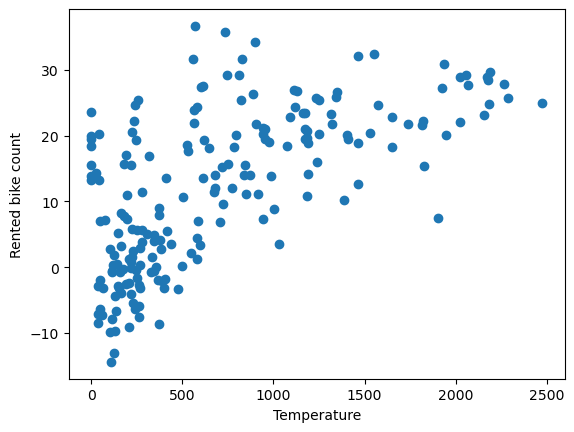

In [84]:
#Plotting the relationships

sampledata = bike.sample(n=200)
plt.xlabel("Temperature")
plt.ylabel("Rented bike count")

plt.scatter(sampledata['Rented Bike Count'], sampledata['Temperature(°C)'])
plt.show()

In [61]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model 

In [62]:
def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return trained_weight,trained_bias, epochs, rmse, history.history 

In [77]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_data.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias 
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

In [64]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [88]:
learning_rate = 0.001
epochs = 70
batch_size = 200

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "Wind speed (m/s)"    # the median income on a specific city block.
my_label = "Rented Bike Count" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Invoke the functions to build and train the model.




In [89]:
my_model = build_model(learning_rate)
weight, bias, epochs, rmse, history = train_model(my_model, training_data, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

Epoch 1/70
29/29 [==============================] - 1s 11ms/step - loss: 801033.3125 - root_mean_squared_error: 895.0046 - val_loss: 1293573.1250 - val_root_mean_squared_error: 1137.3535
Epoch 2/70
29/29 [==============================] - 0s 4ms/step - loss: 800919.8750 - root_mean_squared_error: 894.9413 - val_loss: 1293419.3750 - val_root_mean_squared_error: 1137.2860
Epoch 3/70
29/29 [==============================] - 0s 4ms/step - loss: 800812.7500 - root_mean_squared_error: 894.8814 - val_loss: 1293265.5000 - val_root_mean_squared_error: 1137.2183
Epoch 4/70
29/29 [==============================] - 0s 4ms/step - loss: 800705.6875 - root_mean_squared_error: 894.8216 - val_loss: 1293114.7500 - val_root_mean_squared_error: 1137.1520
Epoch 5/70
29/29 [==============================] - 0s 4ms/step - loss: 800599.5625 - root_mean_squared_error: 894.7623 - val_loss: 1292962.1250 - val_root_mean_squared_error: 1137.0850
Epoch 6/70
29/29 [==============================] - 0s 4ms/step - los

Epoch 45/70
29/29 [==============================] - 0s 3ms/step - loss: 796368.8125 - root_mean_squared_error: 892.3950 - val_loss: 1286922.6250 - val_root_mean_squared_error: 1134.4261
Epoch 46/70
29/29 [==============================] - 0s 3ms/step - loss: 796261.9375 - root_mean_squared_error: 892.3351 - val_loss: 1286773.0000 - val_root_mean_squared_error: 1134.3602
Epoch 47/70
29/29 [==============================] - 0s 3ms/step - loss: 796157.1875 - root_mean_squared_error: 892.2764 - val_loss: 1286627.0000 - val_root_mean_squared_error: 1134.2958
Epoch 48/70
29/29 [==============================] - 0s 3ms/step - loss: 796052.6250 - root_mean_squared_error: 892.2178 - val_loss: 1286472.1250 - val_root_mean_squared_error: 1134.2275
Epoch 49/70
29/29 [==============================] - 0s 3ms/step - loss: 795946.5625 - root_mean_squared_error: 892.1584 - val_loss: 1286325.8750 - val_root_mean_squared_error: 1134.1631
Epoch 50/70
29/29 [==============================] - 0s 3ms/step 

C:\Users\Leke\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


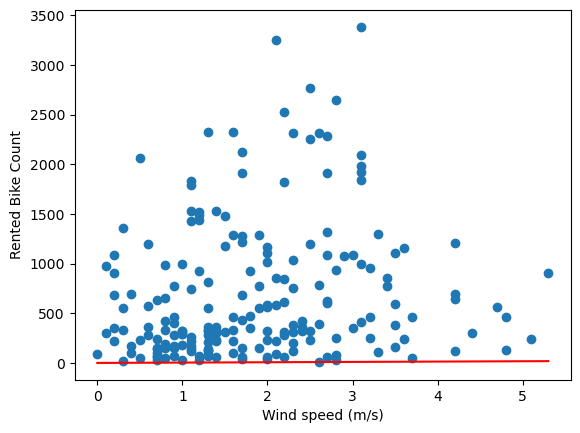

In [90]:
plot_the_model(weight, bias, my_feature, my_label)
#plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
 #                   history["val_root_mean_squared_error"])